# Does SAT Exam provide fair chance to every student?
New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair
![image](nycopendata.jpg)

## Introduction:
One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.




## Resources:
New York City has published data on student SAT scores by high school, along with additional demographic data sets. This dataset is a combination of following cleaned datasets:

- **SAT scores by school**- [SAT scores for each high school in New York City](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)

- **School attendance** - [Attendance information for each school in New York City](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt)

- **Class size** - [Information on class size for each school](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)

- **AP test results** - [Advanced Placement (AP) exam results for each high school](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) (passing an optional AP exam in a particular subject can earn a student college credit in that subject)

- **Graduation outcomes** - [The percentage of students who graduated, and other outcome](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) 

- **Demographics** - [Demographic information for each school](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)

- **School survey** - [Surveys of parents, teachers, and students at each school](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8)

All these datasets are inter related and we need to combine them. They are stored in an associated folder `schools`

|Dataset|Description|
|:-----:|:----------|
|ap_2010.csv| Data on AP test results|
|class_size.csv| Data on Class Size|
|demographies.csv| Data on Demographies|
|graduation.csv| Data on Graduation Outcomes|
|hs_directory.csv| A directory of High Schools|
|sat_results.csv| Data on SAT scores|
|survey_all.txt| Data on **surveys** from all schools|
|survey_d75.txt| Data on **surveys** from New York City District 75|

## Objective:
Determine whether SAT scores is unfair to some groups or not

---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

%matplotlib inline
import matplotlib.style as style

In [2]:
# Set display options 
pd.set_option('display.max_columns', 150)

## Load and Read in the Data

In [3]:
# survey_all.txt and survey_d75.txt are a bit complicated so we will read them in the next cell. 
data_files = [
    'ap_2010.csv',
    'class_size.csv',
    'demographics.csv',
    'graduation.csv',
    'hs_directory.csv',
    'sat_results.csv'
]

data = {} # Storing all the dataframes in a dictionary

for f in data_files:
    d = pd.read_csv('schools/{0}'.format(f))
    data[f.replace('.csv', '')] = d

In [4]:
# Lets take a look through all the datasets inside the dictionary called data
for datasets in data:
    print(data[datasets].head())

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

In [5]:
all_survey = pd.read_csv('schools/survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('schools/survey_d75.txt', delimiter='\t', encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q2h,p_q7a,p_q7b,p_q7c,p_q7d,p_q8a,p_q8b,p_q8c,p_q8d,p_q8e,p_q8f,p_q2b,p_q2d,p_q2e,p_q2f,p_q2g,p_q3a,p_q3b,p_q4b,p_q4c,p_q11c,p_q2a,p_q2c,p_q3c,p_q6a,p_q6b,p_q11d,p_q11e,p_q5,p_q4a,p_q4d,p_q4e,p_q11a,p_q11b,p_q11f,p_q1,p_q3d,p_q9,p_q10,p_q12aa,p_q12ab,p_q12ac,p_q12ad,...,s_q8f_2,s_q8f_3,s_q8g_1,s_q8g_2,s_q8g_3,s_q8h_1,s_q8h_2,s_q8h_3,s_q8i_1,s_q8i_2,s_q8i_3,s_q8j_1,s_q8j_2,s_q8j_3,s_q8k_1,s_q8k_2,s_q8k_3,s_q8l_1,s_q8l_2,s_q8l_3,s_q9i_1,s_q9i_2,s_q9i_3,s_q9j_1,s_q9j_2,s_q9j_3,s_q9k_1,s_q9k_2,s_q9k_3,s_q9l_1,s_q9l_2,s_q9l_3,s_q10_1,s_q10_2,s_q10_3,s_q10_4,s_q11a_1,s_q11a_2,s_q11a_3,s_q11a_4,s_q11b_1,s_q11b_2,s_q11b_3,s_q11b_4,s_q11c_1,s_q11c_2,s_q11c_3,s_q11c_4,s_q12d_1,s_q12d_2,s_q12d_3,s_q12d_4,s_q12e_1,s_q12e_2,s_q12e_3,s_q12e_4,s_q12f_1,s_q12f_2,s_q12f_3,s_q12f_4,s_q12g_1,s_q12g_2,s_q12g_3,s_q12g_4,s_q14_1,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,NaN,22.0,90.0,0,25,150,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9,8.0,8.2,8.3,7.5,7.9,6.8,8.7,9.7,8.7,9.9,9.9,7.7,8.3,7.9,8.1,7.5,7.3,6.7,7.6,7.9,7.5,8.0,7.4,8.7,6.3,6.6,7.6,7.6,7.4,7.8,7.4,NaN,8.3,7.5,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,NaN,34.0,161.0,0,33,269,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4,7.7,7.9,8.0,7.3,7.7,6.5,8.8,9.4,8.7,10.0,9.9,7.5,8.2,7.9,8.0,7.2,7.0,6.9,8.0,8.4,7.4,7.6,7.1,9.0,6.4,6.5,7.6,7.8,8.6,7.7,7.8,NaN,8.3,7.6,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,NaN,42.0,367.0,0,48,505,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0,8.1,8.8,8.9,8.5,8.4,7.6,9.2,9.4,9.2,9.8,9.7,8.4,8.8,8.5,8.3,8.0,7.6,7.3,8.6,8.7,8.4,8.8,8.2,8.8,7.9,6.8,8.5,8.5,8.7,8.6,8.5,NaN,8.9,8.4,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,145.0,29.0,151.0,163,40,301,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9,8.1,8.5,8.8,8.2,8.3,7.3,9.2,9.4,9.1,9.8,9.7,8.3,8.7,8.3,8.1,7.6,7.6,7.5,8.6,8.6,8.4,8.5,8.1,8.8,7.3,6.8,8.2,8.3,8.0,8.7,8.3,NaN,8.8,8.3,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,NaN,23.0,90.0,0,23,151,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0,8.0,8.4,8.6,8.0,8.0,6.5,8.8,9.6,9.4,10.0,10.0,7.6,8.5,8.0,8.2,7.4,7.8,7.2,8.1,7.9,7.8,8.2,8.3,9.2,7.4,

Based on our [Survey Data Dictionary](http://localhost:8888/edit/Soft/dq7-%20Analyzing%20NYC%20High%20School%20Data/Survey%20Data%20Dictionary.xls), we find survey fields (given below) to be important ones for our analysis. 

These columns give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It also gives us `DBN`, which allows us uniquely identify the school. 

In [6]:
# rename dbn to DBN 
survey['DBN'] = survey['dbn']

# Based on the dictionary, following are the most relevant columns
survey_fields = [
    'DBN', 
    'rr_s', 
    'rr_t', 
    'rr_p', 
    'N_s', 
    'N_t', 
    'N_p', 
    'saf_p_11', 
    'com_p_11', 
    'eng_p_11', 
    'aca_p_11', 
    'saf_t_11', 
    'com_t_11', 
    'eng_t_11', 
    'aca_t_11', 
    'saf_s_11', 
    'com_s_11', 
    'eng_s_11', 
    'aca_s_11', 
    'saf_tot_11', 
    'com_tot_11', 
    'eng_tot_11', 
    'aca_tot_11',
]
survey = survey.loc[:,survey_fields]
data['survey'] = survey

In [7]:
data['survey'].head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


Before moving into coding, we'll need to do some background research. A thorough understanding of the data helps us avoid costly mistakes. Background research gives us a better understanding of how to combine and analyze the data

---
### Background Information
A few details we obtained through the backgroud reseach:
- Only high school students take the SAT, so we'll want to focus on high schools.
- New York City is made of 5 boroughs, which are essentially distinct regions.
- New York City schools fall within several different school districts, each of which can contain dozens of schools.
- Our dataset includes several different types of schools, we'll need to clean them so that we can focus on high schools only.
- Each school in NYC has a unique code called a **DBN** or a district borough number
- Aggregating data by district allows us to use district mapping data to plot district-by-district differences.

---

## Data Cleaning
Upon exploring all the datasets, we noticed that some of the datasets like `class_size` and `hs_directory`, don't have a `DBN` column. 
- `hs_directory` has a column but we have to rename it from `dbn` to `DBN`
- `class_size` doesn't have a column on **DBN** at all. 
    - However, on watching the structure of **DBNs** closely in other datasets like `sat_results`, we can see that a DBN is just a combination of `CSD` and `SCHOOL NAME` columns. The good thing is that we have both of the columns in the dataset `class_size`
        - The only thing we have to be careful about is that the DBN is padded, so that the `CSD` portion of it always consist to two digits. So we'll have to add an extra **0** if it is single digited. 

#### Add `DBN` columns
A DBN is a District Borough Number which is a unique identifier for every school in the area

In [8]:
# Lets take a look in hs_directory again!
data['hs_directory'].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,zip,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,"B41, B43, B44-SBS, B45, B48, B49, B69","2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...",883 Classon Avenue,Brooklyn,NY,11225,Bkmusicntheatre.com,399.0,Prospect Heights Educational Campus,NaN,Brooklyn School for Music & Theatre (BSMT) use...,We offer highly competitive positions in our D...,Spanish,"English Language and Composition, United State...",NaN,NaN,"Variety of clubs: Chess, The Step Team, Fashio...","Baseball, Basketball & JV Basketball, Cross Co...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,NaN,F.Y.R.EZONE (Finding Your Rhythm thru Educatio...,NaN,NaN,"In 2002, Roundabout Theatre was selected by Ne...",One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,NaN,NaN,8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,"Bx13, Bx15, Bx17, Bx21, Bx35, Bx4, Bx41, Bx4A,...","2, 5 to Intervale Ave",1110 Boston Road,Bronx,NY,10456,www.hsvd.org,378.0,Morris Educational Campus,NaN,The High School for Violin and Dance (HSVD) is...,Freshmen take both violin and dance; College N...,Spanish,NaN,NaN,NaN,Advancement via Individual Determination (AVID...,"Baseball, Basketball & JV Basketball, Volleyball","Basketball, Softball, Volleyball",NaN,Morris Educational Campus Basketball and Volle...,McGraw Hill - Big Brother Big Sister,NaN,"Hostos Community College, Monroe College, Teac...",Bronx Arts Ensemble,buildOn,Print International,NaN,Bronx Cares,Our students are required to take four years o...,"Student Summer Orientation, Summer Internship ...",8:00 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Bronx students or residents who at...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,"Bx1, Bx11, Bx13, Bx18, Bx2, Bx3, Bx32, Bx35, Bx36","4 to Mt Eden Ave ; B, D to 170th St",1501 Jerome Avenue,Bronx,NY,10452,http://schools.nyc.gov/schoolportals/09/X327,543.0,DOE New Settlement Community Campus,NaN,At the Comprehensive Model School Project (CMS...,"After-school and Saturday Tutoring, Advisory, ...",Spanish,"Biology, Chemistry, United States History",NaN,NaN,"Choir, Gaming, Girls Club, Newspaper, Spanish,...",NaN,NaN,NaN,"As we expand, we plan to offer PSAL sports.",New Settlement Community Center,Montefiore Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Dress Code Required: white or baby blue button...,NaN,8:00 AM,4:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx stud

In [9]:
# Lets take a look in class_size again!
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [10]:
# Remane the DBN 
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return '0' + string_representation
    
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

In [11]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


#### Convert the SAT score and Location Coordinates columns to numeric

- Convert the numerical columns from objects to integers.
- As location feature is of importance in our dataset, extract the latitudes and longitudes

In [12]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce") # coerce the errors so that pandas mentions the invalid entries as NaNs

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

In [13]:
def find_lat(loc):
    coords = re.findall('\(.+, .+\)', loc)
    lat = coords[0].split(',')[0].replace('(', '')
    return lat

def find_lon(loc):
    coords = re.findall('\(.+, .+\)', loc)
    lon = coords[0].split(',')[1].replace(')', '').strip()
    return lon

data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(find_lat)
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(find_lon)

data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')

In [14]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [15]:
data['hs_directory'].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,zip,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,"B41, B43, B44-SBS, B45, B48, B49, B69","2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...",883 Classon Avenue,Brooklyn,NY,11225,Bkmusicntheatre.com,399.0,Prospect Heights Educational Campus,NaN,Brooklyn School for Music & Theatre (BSMT) use...,We offer highly competitive positions in our D...,Spanish,"English Language and Composition, United State...",NaN,NaN,"Variety of clubs: Chess, The Step Team, Fashio...","Baseball, Basketball & JV Basketball, Cross Co...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,NaN,F.Y.R.EZONE (Finding Your Rhythm thru Educatio...,NaN,NaN,"In 2002, Roundabout Theatre was selected by Ne...",One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,NaN,NaN,8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,"Bx13, Bx15, Bx17, Bx21, Bx35, Bx4, Bx41, Bx4A,...","2, 5 to Intervale Ave",1110 Boston Road,Bronx,NY,10456,www.hsvd.org,378.0,Morris Educational Campus,NaN,The High School for Violin and Dance (HSVD) is...,Freshmen take both violin and dance; College N...,Spanish,NaN,NaN,NaN,Advancement via Individual Determination (AVID...,"Baseball, Basketball & JV Basketball, Volleyball","Basketball, Softball, Volleyball",NaN,Morris Educational Campus Basketball and Volle...,McGraw Hill - Big Brother Big Sister,NaN,"Hostos Community College, Monroe College, Teac...",Bronx Arts Ensemble,buildOn,Print International,NaN,Bronx Cares,Our students are required to take four years o...,"Student Summer Orientation, Summer Internship ...",8:00 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Bronx students or residents who at...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,"Bx1, Bx11, Bx13, Bx18, Bx2, Bx3, Bx32, Bx35, Bx36","4 to Mt Eden Ave ; B, D to 170th St",1501 Jerome Avenue,Bronx,NY,10452,http://schools.nyc.gov/schoolportals/09/X327,543.0,DOE New Settlement Community Campus,NaN,At the Comprehensive Model School Project (CMS...,"After-school and Saturday Tutoring, Advisory, ...",Spanish,"Biology, Chemistry, United States History",NaN,NaN,"Choir, Gaming, Girls Club, Newspaper, Spanish,...",NaN,NaN,NaN,"As we expand, we plan to offer PSAL sports.",New Settlement Community Center,Montefiore Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Dress Code Required: white or baby blue button...,NaN,8:00 AM,4:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Bronx students or residents who attend...,

While the main dataset we want to analyse `sat_results` has unique `DBN` values for every high school in NYC, other datasets aren't as clean.

To resolve this issue, we'll attempt to condense the datasets `class_size`, `graduation`, and `demographics` so that **each value in the `DBN` column is unique**. 

--- 
## Condensing the Data

#### Filter the datsets such that the
- The class size will be reduced to **9-12 Graders** and only for **Gen Ed program**
- The demographics will be reduced to year **2011-2012**
- Other changes

In [16]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE '] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']

class_size = class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)
data['class_size'] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [17]:
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,25,28,29,,,,,,,,20.0,10.6,40.0,21.2,23,7,12,6.3,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,52,46,46,,,,,,,,33.0,10.1,59.0,18.0,16,16,51,15.5,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,88,85,91,,,,,,,,128.0,20.4,97.0,15.5,49,31,190,30.4,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,45,28,40,55,55,56,,,,,34.0,8.5,106.0,26.4,59,16,22,5.5,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,31,26,30,,,,,,,,6.0,3.4,45.0,25.6,34,4,9,5.1,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


In [18]:
data['graduation'] = data['graduation'][data['graduation']['Cohort'] == '2006']
data['graduation'] = data['graduation'][data['graduation']['Demographic'] == 'Total Cohort']
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,8,6.5%,15.1%,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,0,0%,0%,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,17,20.2%,36.200000000000003%,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,69,35.799999999999997%,65.7%,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


AP scores to be converted back to numerical values 

In [19]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors='coerce') #coerce the errors

In [20]:
data['ap_2010'].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


---

## Combine the datasets
Lets perform **merge** operation to combine the datasets

In [21]:
combined = data['sat_results']

combined = combined.merge(data['ap_2010'], on='DBN', how='left') # as we only want DBNs that are already there in 'sat_results'
combined = combined.merge(data['graduation'], on='DBN', how='left') # same as above

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7%,42,33.9%,79.2%,8,6.5%,15.1%,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,NaN,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8%,67,74.400000000000006%,95.7%,0,0%,0%,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,NaN,Total Cohort,MARTA VALLE HIGH SCHOOL,2006,84.0,47,56%,40,47.6%,85.1%,17,20.2%,36.200000000000003%,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


In [22]:
to_merge = ['class_size', 'demographics', 'survey', 'hs_directory']

for m in to_merge:
    combined = combined.merge(data[m], on='DBN', how='inner') # we only want the DBNs that commonly exist

combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,...,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,zip,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20112012,NaN,88.6,422,,,,,,,,32,33,50,98,79,80,50,94.0,22.3,105.0,24.9,34,35,59,14.0,123,29.1,227,53.8,7,1.7,259.0,61.4,...,7.7,7.4,7.6,6.3,5.3,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0,01M292,Henry Street School for International Studies,Manhattan,M056,212-406-9411,212-406-9417,6,12,NaN,NaN,"B39, M14A, M14D, M15, M15-SBS, M21, M22, M9","B, D to Grand St ; F to East Broadway ; J, M, ...",220 Henry Street,New York,NY,10002,http://schools.nyc.gov/schoolportals/01/M292,323.0,NaN,NaN,Henry Street School for International Studies ...,"Global/International Studies in core subjects,...","Chinese (Mandarin), Spanish",Psychology,"Chinese Language and Culture, Spanish Literatu...","Chinese (Mandarin), Spanish","Math through Card Play; Art, Poetry/Spoken Wor...",Basketball,Softball,Soccer,"Boxing, Track, CHAMPS, Tennis, Flag Football, ...",The Henry Street Settlement; Asia Society; Ame...,Gouverneur Hospital (Turning Points),New York University,Asia Society,Heart of America Foundation,NaN,NaN,United Nations,NaN,NaN,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,Total Cohor

In [23]:
# Filling the missing values appropriately

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

combined.isnull().sum().sum()

0

As of now,  we are seemingly done with cleaning and combining parts. So lets move on to analysing the data

---

## Data Analysis


#### It might be an interesting to analyse the statistics out of a school district. Adding a column for school district will come handy.
- The school district is just the first two characters of the `DBN` column 

In [24]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined['school_dist'] = combined['DBN'].apply(get_first_two_chars)

In [25]:
combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

### Lets find correlations
Find correlations of features with `sat_score`

In [26]:
correlations = combined.corr()
correlations = correlations['sat_score']
ser_correlations = pd.Series(correlations)

# Bear that this version of ser_correlations has been made ABSOLUTE and sorted. i-e. It won't show negative Corrs
ser_correlations.abs().sort_values(ascending=False)

sat_score                          1.000000
SAT Writing Avg. Score             0.987771
SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
frl_percent                        0.722225
                                     ...   
grade_span_max                          NaN
expgrade_span_max                       NaN
priority08                              NaN
priority09                              NaN
priority10                              NaN
Name: sat_score, Length: 67, dtype: float64

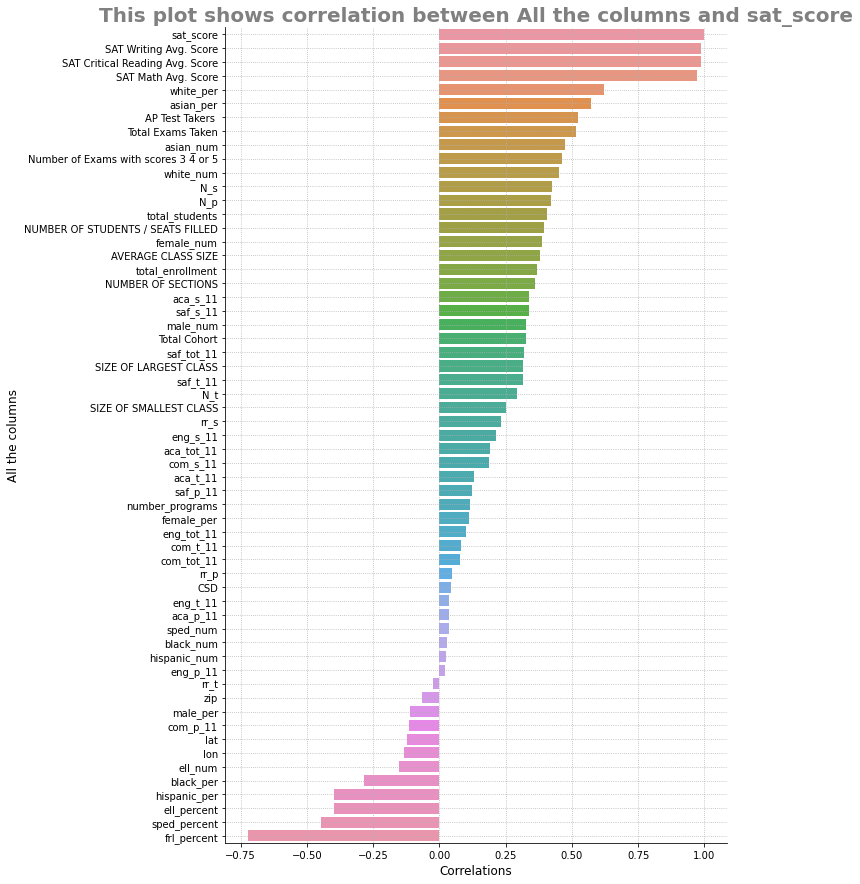

In [27]:
plt.figure(figsize=(9,15))
ser_correlations = ser_correlations.sort_values(ascending=False)
sns.barplot(y = ser_correlations[ser_correlations.notnull()].index, 
            x = ser_correlations[ser_correlations.notnull()],
            orient= 'h')
plt.grid(linestyle=':')
plt.xlabel('Correlations', fontsize=12)
plt.ylabel('All the columns', fontsize=12)
plt.title('This plot shows correlation between All the columns and sat_score', 
          weight='bold', fontsize=20, color='grey')
sns.despine()

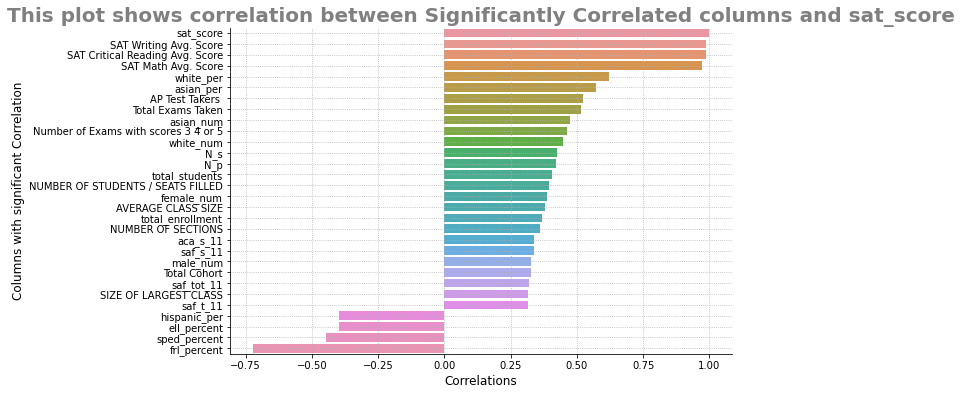

In [28]:
plt.figure(figsize=(9,6))


sns.barplot(y = ser_correlations[(~ser_correlations.between(-.3,.3))&(ser_correlations.notnull())].index, 
            x = ser_correlations[(~ser_correlations.between(-.3,.3))&(ser_correlations.notnull())].sort_values(ascending=False),
            orient= 'h')
plt.grid(linestyle=':')
plt.xlabel('Correlations', fontsize=12)
plt.ylabel('Columns with significant Correlation', fontsize=12)
plt.title('This plot shows correlation between Significantly Correlated columns and sat_score', 
          weight='bold', fontsize=20, color='grey')
sns.despine()

- `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score`, `sat_score` are strongly positvely correlated with the `sat_score`. No wonder! As they are the components of SAT exam
- `total_enrollment` has a positive correlation with `sat_score`. This comes a bit surprising as we'ld expect smaller schools to do better. 
    - Columns such as `total_students`, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken`, and `NUMBER OF SECTIONS` can be taken as the proxies for `total_enrollment`.
- Both the percentages of females `female_per` and the number of females `female_num` at a school correlate positively. But the percentages of males `male_per` and the number of males `male_num` correlate negatively.  
    - This could indicate that girls are doing better than boys at SAT exam.
- Teacher and Student ratings of school safety `saf_t_ll` and `saf_s_ll` correlate with `sat_score`
- Student ratings of school academic standards `aca_s_ll` correlates with `sat_score` but this does not hold true for teachers' and parents' ratings for school acadmic standards `aca_t_ll` and `aca_p_ll`  
- There is a significant racial inequality in SAT scores (`white_per`, `asian_per`, `black_per`, and `hispanic_per`
- The percentage of English language learners at the school (`ell_percent` and `frl_percent`) has a strongs negative correlation with SAT Scores. 
    
Lets draw a ScatterPlot of `total_enrolment` and `sat_score` to see if there is some pattern

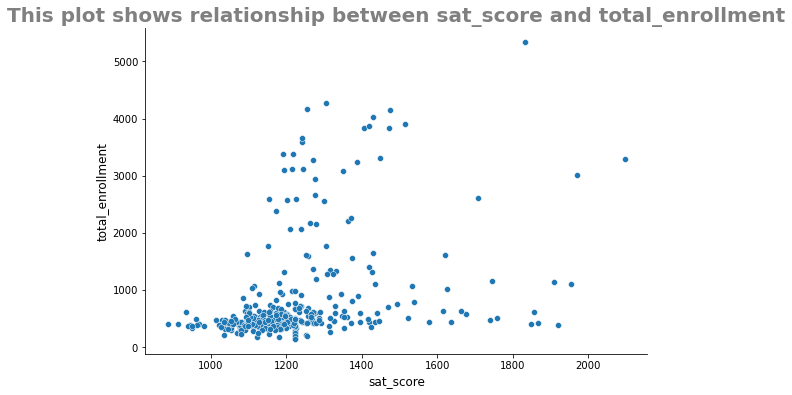

In [29]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=combined['sat_score'], y=combined['total_enrollment'])
plt.xlabel('sat_score', fontsize=12)
plt.ylabel('total_enrollment', fontsize=12)
plt.title('This plot shows relationship between sat_score and total_enrollment', 
          weight='bold', fontsize=20, color='grey')
sns.despine()

- We do not see any such reason behind the relationship between `sat_score` and `total_enrollment`

### Lets find correlation between `survey_fields` and `sat_score` and plot them.

Kindly consult the following data dictionary that is retrieved from the [Survey Data Dictionary](http://localhost:8888/edit/Soft/dq7-%20Analyzing%20NYC%20High%20School%20Data/Survey%20Data%20Dictionary.xls).

|Field|Description|
|:---:|:---------:|
|rr_s|Student Response Rate|
|rr_t|Teacher Response Rate|
|rr_p|Parent Response Rate|
|N_s|Number of student respondents|
|N_t|Number of teacher respondents|
|N_p|Number of parent respondents|
|saf_p_11|Safety and Respect score based on parent responses|
|com_p_11|Communication score based on parent responses|
|eng_p_11|Engagement score based on parent responses|
|aca_p_11|Academic expectations score based on parent responses|
|saf_t_11|Safety and Respect score based on teacher responses|
|com_t_11|Communication score based on teacher responses|
|eng_t_11|Engagement score based on teacher responses|
|aca_t_11|Academic expectations score based on teacher responses|
|saf_s_11|Safety and Respect score based on student responses|
|com_s_11|Communication score based on student responses|
|eng_s_11|Engagement score based on student responses|
|aca_s_11|Academic expectations score based on student responses|
|saf_tot_11|Safety and Respect total score|
|com_tot_11|Communication total score|
|eng_tot_11|Engagement total score|
|aca_tot_11|Academic Expectations total score|



In [30]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove('DBN')

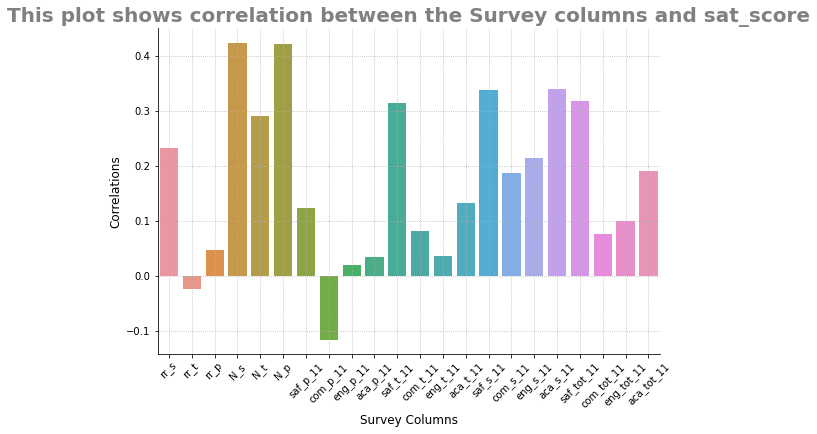

In [31]:
plt.figure(figsize=(9,6))
ser_correlations = ser_correlations.sort_values(ascending=False)
sns.barplot(x = combined.corr()['sat_score'][survey_fields].index, 
            y = combined.corr()['sat_score'][survey_fields],
            )
plt.xlabel('Survey Columns', fontsize=12)
plt.ylabel('Correlations', fontsize=12)
plt.xticks(rotation=45)
plt.title('This plot shows correlation between the Survey columns and sat_score', 
          weight='bold', fontsize=20, color='grey')
plt.grid(which='major', linestyle=':')
sns.despine()

- Highest correlations can be seen among  Number of student respondents `N_s`, Number of teacher respondents `N_t`, Number of parents respondents `N_p` and the `sat_score`. 

- It is more interesting that the student response rate `rr_s`  correlates with `sat_score`. In contrast the teacher response rate `rr_t` shows negative correlation with the `sat_score`. the parent response rate `rr_p` shows very light yet positive correlation with `sat_score`

- How students and teachers and parents percieved safety and respect or `saf_t_11`, `saf_s_11` and `saf_p_11` respectively correlate with `sat_score`. 

- Academic Expectations score by students `aca_s_11`, positively correlates with `sat_score`. Whereas Academic Expectations score by Teachers `aca_t_11` , and  Academic Expectations score by Parents `aca_p_11`, correlate weakly and negatively with the `sat_score`.

#### Lets look at the students', parents' and teachers' perspective on school's safety and see how it correlates with the Sat Scores `sat_score`

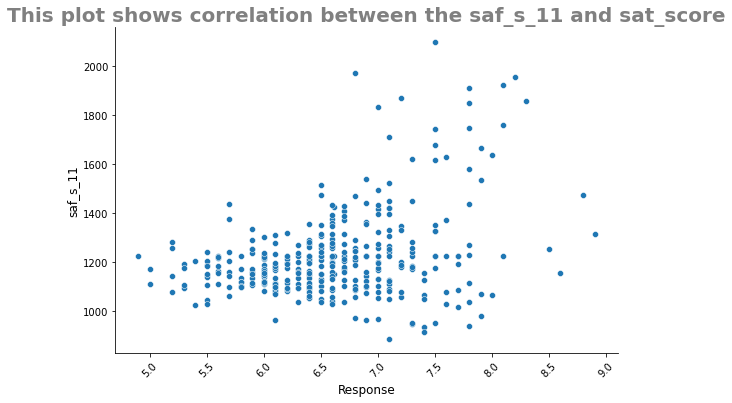

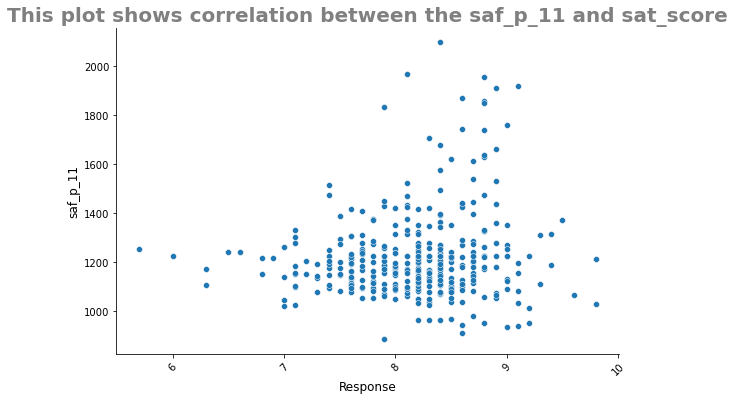

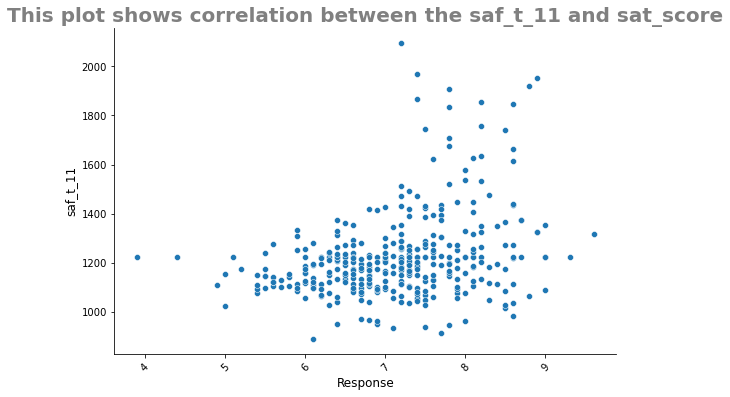

In [32]:
safety_cols = ['saf_s_11', 'saf_p_11', 'saf_t_11']
for col in safety_cols:
    plt.figure(figsize=(9,6))
    sns.scatterplot(x=combined[col], y=combined['sat_score'])
    # plt.grid()
    plt.xlabel('Response', fontsize=12)
    plt.ylabel(str(col), fontsize=12)
    plt.xticks(rotation=45)
    plt.title('This plot shows correlation between the '+str(col)+' and sat_score', 
          weight='bold', fontsize=20, color='grey')
    sns.despine()

- Responses of all the parties, i-e students, parents and teachers  about safety and respect are positively correlated with the `sat_score`
    - The relationship is more impactful for the higher SAT scores. In schools with higher confidence on the safety, we can see the students scoring really well. The opposite is rarely true
    
---

### Race and SAT scores

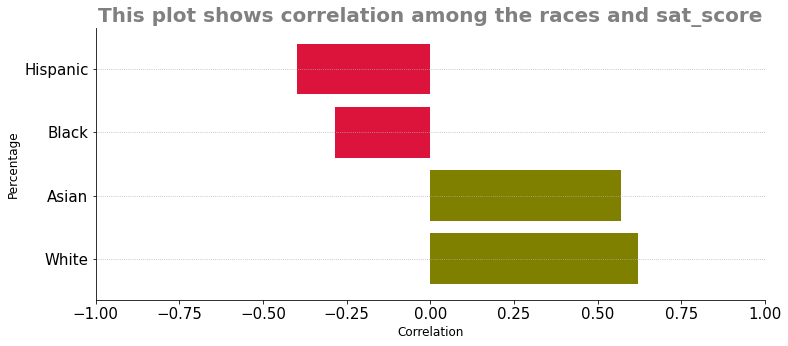

In [33]:
#style.use('seaborn-darkgrid')
score_by_race = ['white_per', 'asian_per', 'black_per', 'hispanic_per', 'sat_score']
race = ['white_per', 'asian_per', 'black_per', 'hispanic_per']

corr_race = combined[score_by_race].corr()
corr_sat = corr_race['sat_score']
corr_sat = corr_sat[race]

pos_corr = corr_sat > 0 
fig = plt.figure(figsize=(12,5))
ax = corr_sat.plot.barh(fontsize=15, width=0.8, color=pos_corr.map({True: 'olive', False: 'crimson'}))
ax.set_title("Race vs SAT score", size=15)
ax.set_xlim(-1,1)
for side in ['left', 'right', 'bottom']:
    ax.spines[side].set_visible(False)
ax.set_yticklabels(['White','Asian','Black','Hispanic'])

plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Correlation', fontsize=12)
plt.title('This plot shows correlation among the races and sat_score', 
          weight='bold', fontsize=20, color='grey')
sns.despine()
plt.grid(which='both', axis='y', linestyle=':')
plt.show()

- A considerably high percentages of students of **White** and **Asian** ethnicities perform better by positively correlating to the SAT Scores `sat_scores`
- Whereas the students belonging from **Blacks** and **Hispanic** races seems doing opposite. Their SAT scores correlate negatively with the `sat_scores`.

#### Lets look into the Hispanic Students and the Schools with low scores.

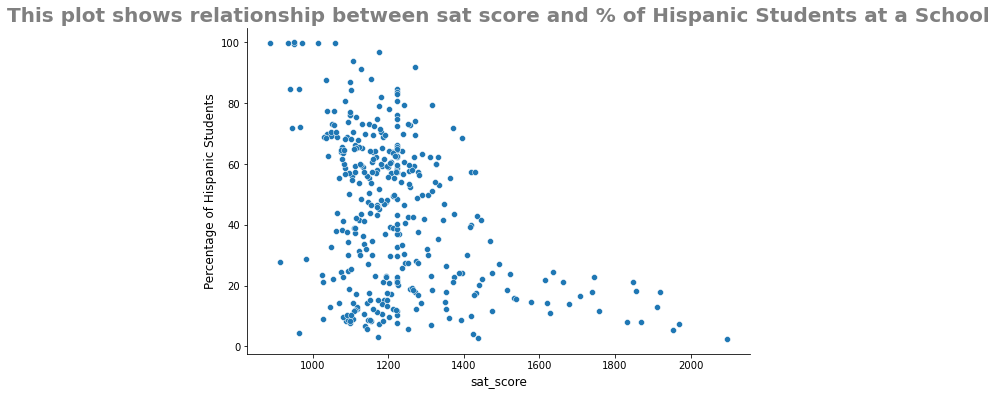

In [34]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=combined['sat_score'], y=combined['hispanic_per'])
plt.xlabel('sat_score', fontsize=12)
plt.ylabel('Percentage of Hispanic Students', fontsize=12)
plt.title('This plot shows relationship between sat score and % of Hispanic Students at a School', 
          weight='bold', fontsize=20, color='grey')
sns.despine()

- This is quite evident and unfornate that in NYC, the schools with **higher presence of Hispanic Students achieve poorer SAT scores**

#### Lets explore this relationship a bit more closely by narrowing down to the schools that have an overwhelming percentage of Hispanic Students and vice-versa

In [35]:
# Schools with hispanic_per > 95%
hispanic_lowbool = combined['hispanic_per'] > 95

# Lets select the column that could have some information that links with the low performance of hispanic race
combined[hispanic_lowbool][['sat_score', 'SCHOOL NAME', 'AVERAGE CLASS SIZE', 'school_type', 'total_students', 'school_dist',
                          'ell_percent', 'sped_percent', 'asian_per', 'white_per', 'black_per', 'hispanic_per', 
                          'Total Exams Taken', 'Number of Exams with scores 3 4 or 5',]]

,sat_score,SCHOOL NAME,AVERAGE CLASS SIZE,school_type,total_students,school_dist,ell_percent,sped_percent,asian_per,white_per,black_per,hispanic_per,Total Exams Taken,Number of Exams with scores 3 4 or 5
44,1058.0,MANHATTAN BRIDGES HIGH SCHOOL,23.475000,0,552.0,02,72.6,1.7,0.2,0.0,0.0,99.8,102.000000,59.00
82,1174.0,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,28.060000,0,650.0,06,19.6,18.1,0.0,0.3,2.3,96.7,197.038462,153.45
89,1014.0,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...,25.430769,0,491.0,06,89.6,0.0,0.0,0.0,0.0,99.8,138.000000,73.00
125,951.0,ACADEMY FOR LANGUAGE AND TECHNOLOGY,23.714286,0,301.0,09,86.6,0.9,0.0,0.0,0.6,99.4,20.000000,20.00
141,934.0,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,23.723077,0,543.0,10,79.9,4.6,0.2,0.0,0.0,99.8,73.000000,45.00
176,970.0,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,15.361538,International School,401.0,12,92.9,0.2,0.0,0.0,0.0,99.8,197.038462,153.45
253,887.0,MULTICULTURAL HIGH SCHOOL,23.808333,0,322.0,19,94.6,1.0,0.0,0.0,0.2,99.8,44.000000,39.00
286,951.0,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,19.726667,International School,367.0,24,91.3,0.8,0.0,0.0,0.0,100.0,197.038462,153.45


In [36]:
# Schools with hispanic < 10%
hispanic_highbool = combined['hispanic_per'] < 10
combined[hispanic_highbool][['sat_score', 'SCHOOL NAME', 'AVERAGE CLASS SIZE', 'school_type', 'total_students', 'school_dist',
                          'ell_percent', 'sped_percent', 'asian_per', 'white_per', 'black_per', 'hispanic_per', 
                          'Total Exams Taken', 'Number of Exams with scores 3 4 or 5',]]

,sat_score,SCHOOL NAME,AVERAGE CLASS SIZE,school_type,total_students,school_dist,ell_percent,sped_percent,asian_per,white_per,black_per,hispanic_per,Total Exams Taken,Number of Exams with scores 3 4 or 5
37,2096.000000,STUYVESANT HIGH SCHOOL,31.115789,Specialized School,3292.0,02,0.0,0.4,72.1,23.7,1.2,2.4,2819.000000,2648.00
46,1424.000000,HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES,21.817647,0,410.0,02,38.2,2.3,89.5,2.3,3.4,4.0,96.000000,89.00
151,1969.000000,BRONX HIGH SCHOOL OF SCIENCE,31.163158,Specialized School,3037.0,10,0.1,0.1,63.5,25.4,3.5,7.2,2435.000000,2189.00
187,1833.000000,BROOKLYN TECHNICAL HIGH SCHOOL,32.452632,Specialized School,5458.0,13,0.1,0.5,60.3,21.3,10.2,7.9,3692.000000,2687.00
192,1312.000000,BEDFORD ACADEMY HIGH SCHOOL,21.793750,0,361.0,13,1.1,4.1,2.7,0.3,89.4,7.1,57.000000,16.00
194,1391.000000,BENJAMIN BANNEKER ACADEMY,27.894737,0,907.0,13,0.0,3.0,2.7,0.4,87.0,8.8,149.000000,62.00
220,1097.000000,BOYS AND GIRLS HIGH SCHOOL,26.513333,0,940.0,16,2.5,20.5,0.5,0.7,90.0,7.8,32.000000,153.45
223,1139.000000,ACADEMY FOR COLLEGE PREPARATION AND CAREER EXP...,24.813333,0,532.0,17,5.0,10.8,0.2,1.1,92.0,6.7,82.000000,7.00
226,1176.000000,THE HIGH SCHOOL FOR GLOBAL CITIZENSHIP,26.393750,0,256.0,17,5.2,13.4,1.5,1.5,89.2,7.3,34.000000,153.45
227,1088.000000,"SCHOOL FOR HUMAN RIGHTS, THE",30.937500,0,416.0,17,6.2,15.0,0.8,1.6,88.9,8.3,197.038462,153.45


- One thing that should catch our attention is the `ell_percent`. It is the most obvious factor that shows up from the above data. The `ell_percent` stands for **English Language Learners - percentage**.
    - The schools are overwhelmingly filled with Hispanic Students but it seems like as if they are either taught or assessed in English Language. 
    
---

### Gender and SAT scores

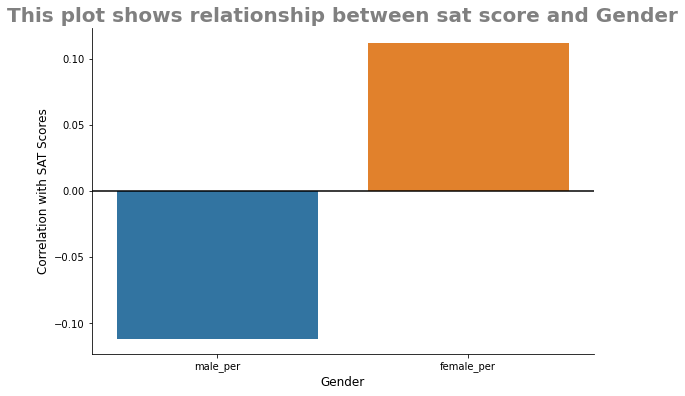

In [37]:
gender = ['male_per', 'female_per']
plt.figure(figsize=(9,6))
sns.barplot(x = combined.corr()['sat_score'][gender].index, 
            y = combined.corr()['sat_score'][gender], 
           )
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Correlation with SAT Scores', fontsize=12)
plt.title('This plot shows relationship between sat score and Gender', 
          weight='bold', fontsize=20, color='grey')
plt.axhline(0, color='black')
sns.despine()


- **Very Weak Correlations** shown by both of the genders towards the scores. 
    - A higher percentage of males correlates negatively (around -0.11) with `sat_score`
    - Whereas higher percentages of females correlates positively (around 0.11) with `sat_score`
    
Lets look at the schools that if the ratio between male students and female students plays a role in SAT scores of the students

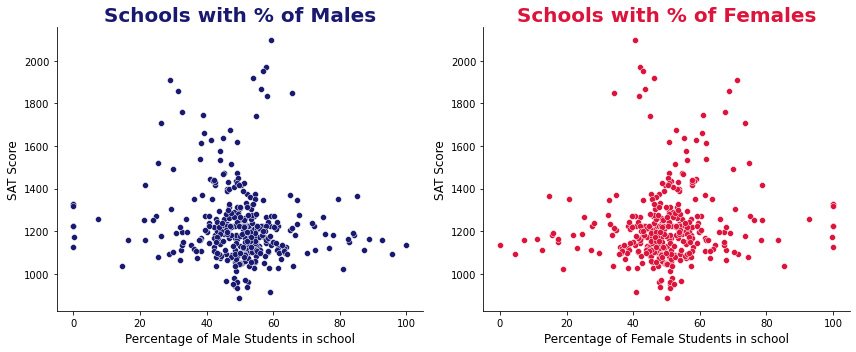

In [38]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=combined['male_per'], y=combined['sat_score'], color='midnightblue')
plt.xlabel('Percentage of Male Students in school', fontsize=12)
plt.ylabel('SAT Score', fontsize=12)
plt.title('Schools with % of Males', 
          weight='bold', fontsize=20, color='midnightblue')
sns.despine()

plt.subplot(1,2,2)
sns.scatterplot(x=combined['female_per'], y=combined['sat_score'], color='crimson')
plt.xlabel('Percentage of Female Students in school', fontsize=12)
plt.ylabel('SAT Score', fontsize=12)
plt.title('Schools with % of Females', 
          weight='bold', fontsize=20, color='crimson')
sns.despine()
          
plt.tight_layout()


- From the above plots we can determine that both are pretty vague. As it was earlier seen, comaparively,  the **females tend to do slightly better** than the male counterparts.
- One common observation is that the schools with **more balanced male:female ratio tends to perform better** at SAT score.

Lets also take a look into the schools where the females are doing better

In [39]:
female_bool = combined['female_per'] > 60
score_bool = combined['sat_score'] > 1700

combined[female_bool & score_bool][['SCHOOL NAME', 'sat_score', 'female_per']]


,SCHOOL NAME,sat_score,female_per
5,BARD HIGH SCHOOL EARLY COLLEGE,1856.0,68.7
26,ELEANOR ROOSEVELT HIGH SCHOOL,1758.0,67.5
60,BEACON HIGH SCHOOL,1744.0,61.0
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,1707.0,73.6
302,TOWNSEND HARRIS HIGH SCHOOL,1910.0,71.1


On searching about these schools on google, we found out that these schools are inclined towards **Arts**

---

### Class Size and SAT Scores

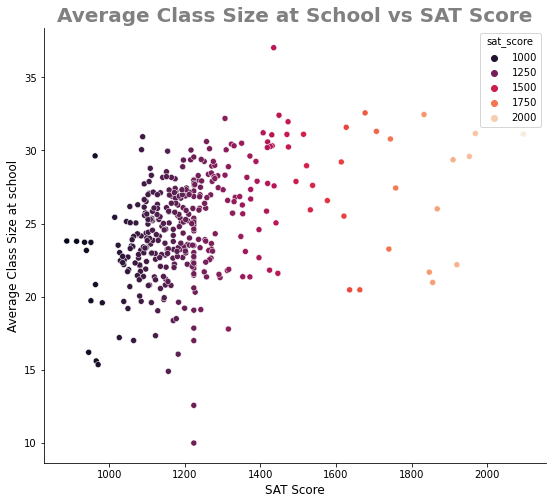

In [40]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=combined['sat_score'], y=combined['AVERAGE CLASS SIZE'], data=combined,
                palette='rocket', hue='sat_score')
plt.xlabel('SAT Score', fontsize=12)
plt.ylabel('Average Class Size at school', fontsize=12)
plt.title('Average Class Size at School vs SAT Score', 
          weight='bold', fontsize=20, color='grey')
sns.despine()

- While there is no such relationship between Class Size and SAT Scores. Nearly all of the **high scores come from the classes of size between 20 to 32**

In [41]:
class_size_wise = combined[(combined['AVERAGE CLASS SIZE'] > 20) & (combined['AVERAGE CLASS SIZE'] < 33)]

class_size_wise.sort_values(by='sat_score', ascending=False)[['SCHOOL NAME', 'AVERAGE CLASS SIZE', 'sat_score']]

,SCHOOL NAME,AVERAGE CLASS SIZE,sat_score
37,STUYVESANT HIGH SCHOOL,31.115789,2096.0
151,BRONX HIGH SCHOOL OF SCIENCE,31.163158,1969.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,29.588235,1953.0
155,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,22.189474,1920.0
302,TOWNSEND HARRIS HIGH SCHOOL,29.362500,1910.0
...,...,...,...
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,23.714286,951.0
179,HIGH SCHOOL OF WORLD CULTURES,23.166667,939.0
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,23.723077,934.0
225,INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS,23.792308,913.0


---

### AP exam and SAT scores
In U.S., high school students take [Advanced Placement (AP) exam](https://apstudents.collegeboard.org/ap-exams-overview) to earn college credit. It makes sense that the number of students at a school who took AP would be highly correlated with the school's SAT score. Lets explore this relationship

In [42]:
# Add a new column in combined to express the ratio of AP exam takers. (we will not use total_enrolment)
combined['ap_per'] = combined['AP Test Takers ']/combined['total_enrollment']

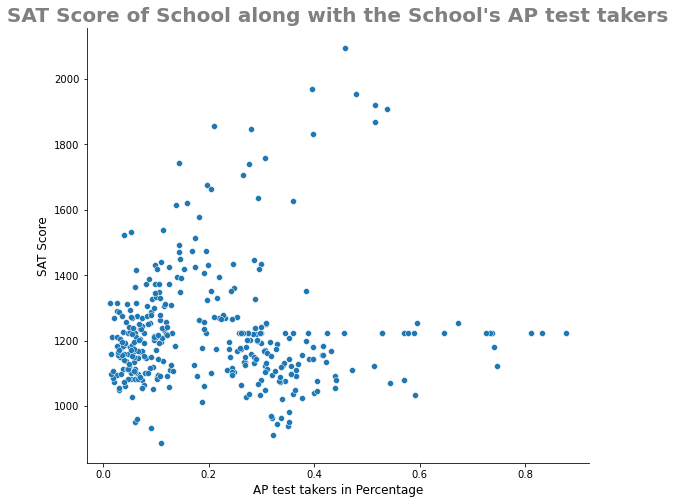

In [43]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=combined['ap_per'], y=combined['sat_score'])
plt.xlabel('AP test takers in Percentage', fontsize=12)
plt.ylabel('SAT Score', fontsize=12)
plt.title('SAT Score of School along with the School\'s AP test takers', 
          weight='bold', fontsize=20, color='grey')
sns.despine()

- For a number of schools we see that that the performance of SAT score and AP test taking (hence its preparation) goes hand in glove. This is apparent specially for the schools that have **less than 60%** of the students who are also taking an AP.
- However, with a sharp change in the plot,  the relationship doesn't hold true for the schools where there are **more than 60%** of the students who took AP.

- It can also be said that  **SAT Scores that are higher than 1450** share an obvious positively correlant relationship with the percentage of test takers of AP of the school

So lets check for the SAT scores above 1450

In [44]:
score_bool = combined['sat_score'] > 1450
score_wise = combined[score_bool][['SCHOOL NAME' ,'ap_per', 'sat_score',]].sort_values(by='ap_per', ascending=False)
score_wise.head()

,SCHOOL NAME,ap_per,sat_score
302,TOWNSEND HARRIS HIGH SCHOOL,0.537719,1910.0
155,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,0.514589,1920.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,0.514354,1868.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,0.478261,1953.0
37,STUYVESANT HIGH SCHOOL,0.457992,2096.0


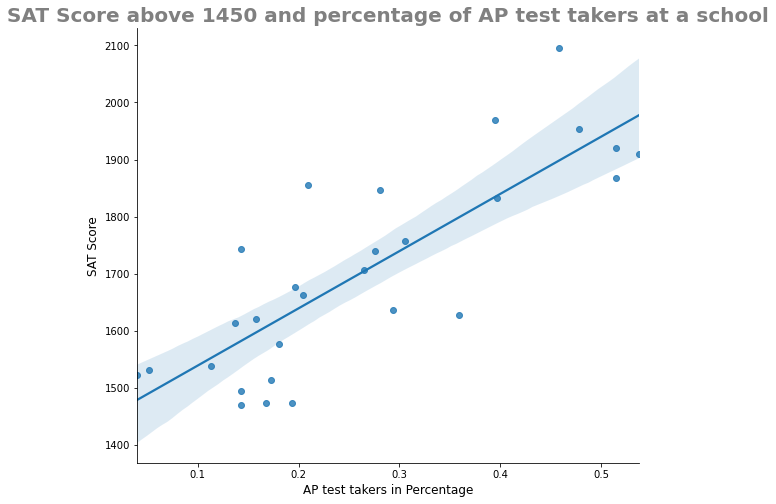

In [45]:
plt.figure(figsize=(9,8))
sns.regplot(x=score_wise['ap_per'], y=score_wise['sat_score'])
plt.xlabel('AP test takers in Percentage', fontsize=12)
plt.ylabel('SAT Score', fontsize=12)
plt.title('SAT Score above 1450 and percentage of AP test takers at a school', 
          weight='bold', fontsize=20, color='grey')
sns.despine()

In [46]:
score_wise.corr()

,ap_per,sat_score
ap_per,1.000000,0.817398
sat_score,0.817398,1.000000


- For the SAT scores above 1450, there is **very High** Correlaion between `ap_per` and `sat_score`
---

### Borough Safety Scores and SAT Scores

In [47]:
boro_wise = combined.groupby('boro').agg(np.mean)
boro_wise['saf_s_11'].sort_values(ascending=False)

boro
Manhattan        6.831370
Queens           6.721875
Bronx            6.606577
Staten Island    6.530000
Brooklyn         6.370755
Name: saf_s_11, dtype: float64

Manhattan and Queens have the highest safety scores, whereas Brooklyn has the lowest safety score among all the boroughs

In [48]:
boro_wise

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,schoolyear,fl_percent,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon,ap_per
boro,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bronx,384.050714,393.891831,379.655657,1157.598203,96.473842,149.445409,135.694086,136.857093,9.548387,123.113090,5.011787,23.894857,19.253574,27.982096,0.0,20112012.0,0.0,75.156989,578.236559,89.752688,18.245161,94.010753,16.587097,38.419355,3.283871,167.483871,30.237634,343.365591,63.169892,25.376344,2.709677,301.172043,50.319355,277.053763,49.678495,80.440860,80.784946,42.440860,435.959229,30.559140,202.333333,8.346237,7.805376,7.639785,7.947312,7.026882,6.397849,6.884946,7.427957,6.606577,6.093492,6.630326,7.418079,7.322581,6.765591,7.046237,7.598925,12.0,12.0,10461.408602,549.569892,1.344086,0.0,0.0,0.0,40.845473,-73.890973,0.189331
Brooklyn,391.336947,404.612644,385.414869,1181.364461,131.645682,202.857765,164.940094,183.870968,18.000000,168.902227,6.373460,24.624036,19.652370,28.616222,0.0,20112012.0,0.0,68.186792,775.613208,88.943396,11.327358,100.481132,14.794340,129.575472,7.376415,335.207547,56.233962,196.962264,28.701887,109.622642,7.037736,405.037736,51.499057,370.575472,48.500000,77.952830,82.122642,34.783019,575.726415,39.179245,249.754717,8.036792,7.600000,7.516981,7.789623,6.985849,6.509434,6.979245,7.497170,6.370755,6.028302,6.549057,7.313208,7.129245,6.715094,7.016038,7.535849,12.0,12.0,11216.150943,751.556604,1.971698,0.0,0.0,0.0,40.665555,-73.947829,0.217670
Manhattan,421.070149,437.824710,419.436551,1278.331410,126.135363,192.661966,153.337778,155.421505,2.900000,143.512969,5.522550,24.605099,20.314768,28.176947,0.0,20112012.0,0.0,64.806667,616.233333,57.033333,12.822222,69.788889,13.618889,89.344444,10.878889,155.444444,26.634444,289.522222,52.272222,75.600000,9.127778,275.733333,45.700000,340.500000,54.300000,83.322222,85.211111,39.900000,495.615741,31.566667,203.255556,8.288889,7.577778,7.465556,7.786667,7.287778,6.432222,6.963333,7.472222,6.831370,6.179883,6.644895,7.408475,7.473333,6.728889,7.021111,7.556667,12.0,12.0,10024.744444,633.588889,1.433333,0.0,0.0,0.0,40.766244,-73.975350,0.246578
Queens,422.274953,448.207556,416.270522,1286.753032,160.463942,238.014423,153.975000,307.208165,26.906250,254.299343,9.143399,26.128505,20.314646,30.070502,0.0,20112012.0,0.0,55.751562,1217.406250,154.140625,11.882813,131.015625,10.442188,346.359375,23.670313,276.750000,30.064062,434.812500,33.646875,149.406250,11.757812,624.593750,49.248438,592.812500,50.751562,82.000000,84.796875,38.718750,878.234375,57.046875,318.843750,8.098437,7.476563,7.425000,7.685937,7.365625,6.789063,7.139063,7.668750,6.721875,6.090625,6.664063,7.410938,7.387500,6.779687,7.073438,7.593750,12.0,12.0,11343.000000,1187.187500,2.390625,0.0,0.0,0.0,40.715715,-73.836422,0.184006
Staten Island,457.500000,472.500000,452.500000,1382.500000,228.908654,355.111538,194.435000,450.787097,31.000000,380.528319,13.251284,28.119729,19.995494,32.785641,0.0,20112012.0,0.0,38.310000,1850.600000,64.200000,2.860000,301.500000,16.710000,177.700000,10.300000,307.300000,18.270000,418.700000,22.170000,938.700000,48.810000,948.500000,52.090000,902.100000,47.910000,88.900000,91.300000,43.500000,1476.600000,88.900000,593.300000,7.800000,7.390000,7.460000,7.620000,7.210000,7.14

In [49]:
boro_wise[['saf_s_11', 'sat_score', 'ell_percent', 'frl_percent', 
           'total_students', 'total_enrollment', 'number_programs', 'N_s', 'N_t', 'Total Cohort']]

,saf_s_11,sat_score,ell_percent,frl_percent,total_students,total_enrollment,number_programs,N_s,N_t,Total Cohort
boro,,,,,,,,,,
Bronx,6.606577,1157.598203,18.245161,75.156989,549.569892,578.236559,1.344086,435.959229,30.559140,136.857093
Brooklyn,6.370755,1181.364461,11.327358,68.186792,751.556604,775.613208,1.971698,575.726415,39.179245,183.870968
Manhattan,6.831370,1278.331410,12.822222,64.806667,633.588889,616.233333,1.433333,495.615741,31.566667,155.421505
Queens,6.721875,1286.753032,11.882813,55.751562,1187.187500,1217.406250,2.390625,878.234375,57.046875,307.208165
Staten Island,6.530000,1382.500000,2.860000,38.310000,1847.500000,1850.600000,5.000000,1476.600000,88.900000,450.787097


- Although the perception about borough's safety didn't play a coherent role in the SAT scores of the schools. Other factors that are associated with borough's own statistics seem to play the role in the SAT scores of the schools in that borough. Such factors are (limited to that particular borough)
- Percentage of English Language Learners `ell_percent`
- Percentage of students taking Free Lunch `frl_percent`
- `total_students` and `total_enrollment`
- The number of program school offers `number_programs` and `Total Cohort`
- Number of student and teacher respondents to the surveys. `N_s` and `N_t`

---

### Financial Status and Sat Scores.
One way to check for the financial status of a student is to see if the School in entitled for the **Free Lunch**

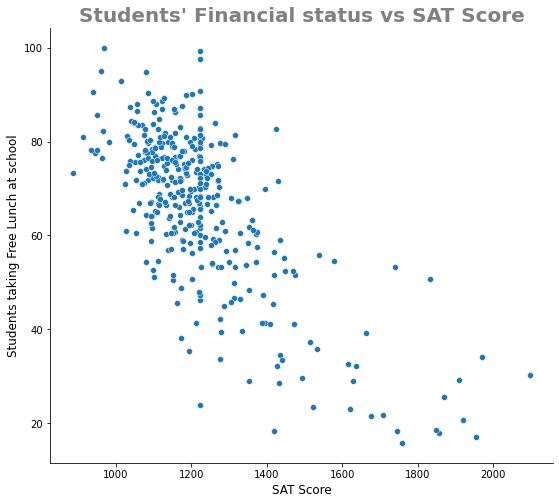

In [50]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=combined['sat_score'], y=combined['frl_percent'],
                palette='rocket')
plt.xlabel('SAT Score', fontsize=12)
plt.ylabel('Students taking Free Lunch at school', fontsize=12)
plt.title('Students\' Financial status vs SAT Score', 
          weight='bold', fontsize=20, color='grey')
sns.despine()

- There is a **high Negative Correlation** between financial status of a student inferred by the student's Lunch package. Schools with high percentage of the students taking Free Lunch Package `frl_percent` perform low on SAT `sat_score`

---

## Conclusions

1. Perception of Safety and Respect has also an impact on the SAT scores. However, it is not very strong.

2. Students in Schools with Low enrollments usually struggle to post SAT scores higher than 1500.

3. SAT scores have an impact of Racial distinctions as well. Schools with higher White and Asian students correlates positively with SAT scores. And schools with higher Black and Hispanic students have a negative bond with SAT scores

4. Hispanic Students' poor performance on test has a very strong link with ELL, English Language Learners's percentage.

5. Gender do not play a considerable part in SAT scores

6. Only the schools with Class sizes of 20-33 students could garner SAT scores above 1600

7. AP scores share an interesting relation with SAT scores. There is a haphazard relation but for SAT score of 1450 and above, AP scores correlates tremendously positive.

8. Borough Safety does not have considerable impact on SAT scores

9. Many Statistics related to Boroughs have a role in SAT scores of the schools a borough

10. Financial status of a student, that we inferred from the students' participation in Redudced-Cost or Free Lunch packages has a High role to play with SAT Scores. There is a very strong negative Correlation     